In [4]:
import pyepsg
import snappy
from snappy import HashMap
import gc   
from snappy import GPF
jpy = snappy.jpy
from snappy import ProductIO, File
from snappy import GPF
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
import numpy as np
import fiona
import rasterio
from rasterio.windows import Window
from rasterio.plot import show
from rasterio.enums import Resampling
import rasterio.mask

In [5]:
#file type
File = jpy.get_type('java.io.File')

#product to be used
#archi=File('metaCrop.tif')
archi=File('../tif/AllBandsTiff/Subset_projected_S3A_SL_2_LST____20190317T084957_20190317T085257_20210119T200650_0179_042_278_2340_LR1_R_NT_004.SEN3.tif')
#archi=File('S3B_SL_2_LST____20210616T094035_20210616T094335_20210617T190722_0179_053_307_2340_LN2_O_NT_004.SEN3')
product = ProductIO.readProduct(archi)
reader = snappy.ProductIO.getProductReader('SEN3')

#listing all bands
list(product.getBandNames())

['NDVI',
 'TCWV',
 'biome',
 'fraction',
 'LST',
 'LST_uncertainty',
 'exception',
 'x_in',
 'y_in',
 'bayes_in',
 'cloud_in',
 'confidence_in',
 'pointing_in',
 'probability_cloud_dual_in',
 'probability_cloud_single_in',
 'elevation_in',
 'latitude_in',
 'longitude_in',
 'detector_in',
 'pixel_in',
 'scan_in',
 'x_tx',
 'y_tx',
 'latitude_tx',
 'longitude_tx',
 'sat_azimuth_tn',
 'sat_path_tn',
 'sat_zenith_tn',
 'solar_azimuth_tn',
 'solar_path_tn',
 'solar_zenith_tn',
 'cloud_fraction_tx',
 'dew_point_tx',
 'east_west_stress_tx_time_1_tx',
 'east_west_stress_tx_time_2_tx',
 'east_west_stress_tx_time_3_tx',
 'east_west_stress_tx_time_4_tx',
 'east_west_stress_tx_time_5_tx',
 'latent_heat_tx_time_1_tx',
 'latent_heat_tx_time_2_tx',
 'latent_heat_tx_time_3_tx',
 'latent_heat_tx_time_4_tx',
 'latent_heat_tx_time_5_tx',
 'north_south_stress_tx_time_1_tx',
 'north_south_stress_tx_time_2_tx',
 'north_south_stress_tx_time_3_tx',
 'north_south_stress_tx_time_4_tx',
 'north_south_stress_tx_t

In [10]:
from snappy import WKTReader
import geopandas as gpd

shp= gpd.read_file(r'../Malta Shape File/MaltaShapeFile.shp') 
#print(shp)
geom=str(shp['geometry'][0])# get the geometry of polygon shapefile as string. 
geom = WKTReader().read(geom) #create WKT file from the Shapefile.

par = HashMap()
par.put('copyMetadata', True)
par.put('geoRegion', geom)
product = GPF.createProduct('Subset', par, product) #Spatial subset.

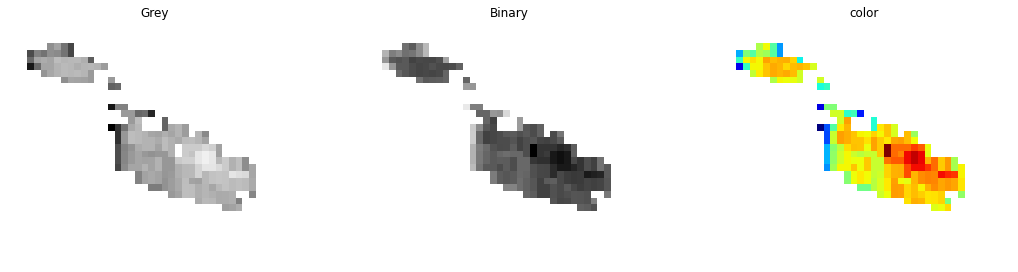

In [11]:
# Get LST Band
#band = product.getBand('LST') # Assign Band to a variable
band = product.getBand('LST')
w = product.getSceneRasterWidth() # Get Band Width
h = product.getSceneRasterHeight() # Get Band Height

# Create an empty array
band_data = np.zeros(w * h, np.float32)
# Populate array with pixel value
band.readPixels(0, 0, w, h, band_data) 
# Reshape
band_data.shape = h, w
# Plot the band  
plt.figure(figsize=(18,10))

##Heatmap colours
color = cm.jet
color.set_bad('white')
#plt.imshow(band_data, cmap = color)

#plt.show()

plt.subplot(131)
plt.imshow(band_data, cmap='gray'), plt.title('Grey')
plt.axis('off')
plt.subplot(132)
plt.imshow(band_data, cmap = plt.cm.binary), plt.title('Binary')
plt.axis('off')
plt.subplot(133)
plt.imshow(band_data, cmap = color), plt.title('color')
plt.axis('off')
plt.show()

In [16]:
ProductIO.writeProduct(product, 'fulltestTiff', 'GeoTIFF-BigTIFF')